## Histograms are a great way to visualize individual color components

In [2]:
import cv2
import numpy as np

# We need to import matplotlib to create our histogram plots
from matplotlib import pyplot as plt

In [3]:
image = cv2.imread('DATA/DOGS.jpeg')

In [4]:
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

In [5]:
cv2.calcHist?

In [6]:
histogram

array([[4.8870e+03],
       [3.3190e+03],
       [5.9260e+03],
       [9.2030e+03],
       [1.2082e+04],
       [1.3585e+04],
       [1.3058e+04],
       [1.1088e+04],
       [8.8950e+03],
       [7.2790e+03],
       [6.6220e+03],
       [5.6940e+03],
       [5.3450e+03],
       [5.2500e+03],
       [5.0760e+03],
       [5.1150e+03],
       [5.1260e+03],
       [5.0600e+03],
       [4.9370e+03],
       [4.9620e+03],
       [4.8930e+03],
       [4.9350e+03],
       [4.8980e+03],
       [4.8740e+03],
       [5.0250e+03],
       [4.9910e+03],
       [4.8070e+03],
       [5.0430e+03],
       [5.1530e+03],
       [5.1490e+03],
       [4.9940e+03],
       [4.9590e+03],
       [5.0500e+03],
       [4.9670e+03],
       [5.0820e+03],
       [4.8030e+03],
       [4.8880e+03],
       [4.8860e+03],
       [4.8330e+03],
       [4.8560e+03],
       [4.7370e+03],
       [4.6710e+03],
       [4.7040e+03],
       [4.6030e+03],
       [4.4400e+03],
       [4.3190e+03],
       [4.3350e+03],
       [4.112

In [7]:
image.ravel()

array([ 10,  22,   4, ...,  65,  85, 120], dtype=uint8)

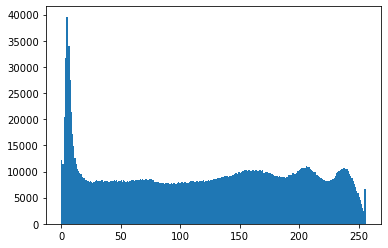

In [8]:
# We plot a histogram, ravel() flatens our image array 
plt.hist(image.ravel(), 256, [0, 256])
plt.show()

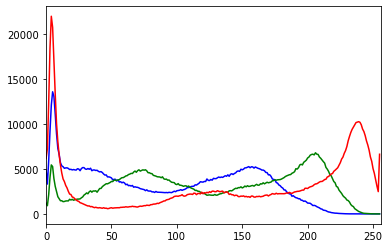

In [9]:
# Viewing Separate Color Channels
color = ('b', 'g', 'r')

# We now separate the colors and plot each in the Histogram
for i, col in enumerate(color):
    histogram2 = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histogram2, color = col)
    plt.xlim([0,256])
    
plt.show()

**cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])**

- images : it is the source image of type uint8 or float32. it should be given in square brackets, ie, "[img]".
- channels : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
- mask : mask image. To find histogram of full image, it is given as "None". But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)
- histSize : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
- ranges : this is our RANGE. Normally, it is [0,256].

In [10]:
import cv2
import numpy as np

# We need to import matplotlib to create our histogram plots
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
image = cv2.imread('DATA/tobago.jpg')

In [12]:
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

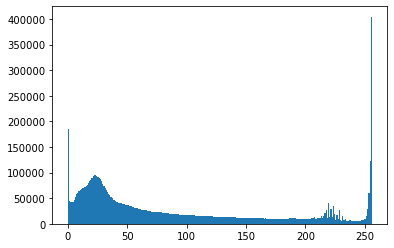

In [13]:
# We plot a histogram, ravel() flatens our image array 
plt.hist(image.ravel(), 256, [0, 256]); plt.show()

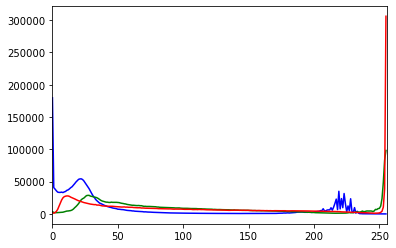

In [14]:
# Viewing Separate Color Channels
color = ('b', 'g', 'r')

# We now separate the colors and plot each in the Histogram
for i, col in enumerate(color):
    histogram2 = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histogram2, color = col)
    plt.xlim([0,256])
    
plt.show()

In [15]:
image = cv2.imread('DATA/tobago.jpg')
cv2.imshow("Tobago", image) 

cv2.waitKey(0)
cv2.destroyAllWindows()

### Masking

We can mask only certain parts of the image.

In [17]:
rainbow = cv2.imread('DATA/rainbow.jpg')
show_rainbow =cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

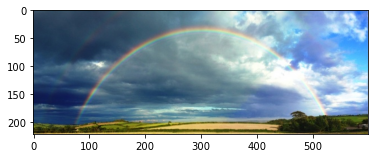

In [18]:
plt.imshow(show_rainbow)

In [19]:
cv2.imshow("im", show_rainbow)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
img = rainbow

In [21]:
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[300:400, 100:400] = 255

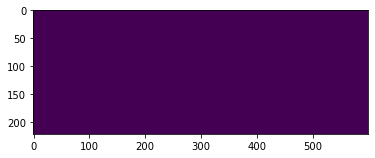

In [22]:
plt.imshow(mask)

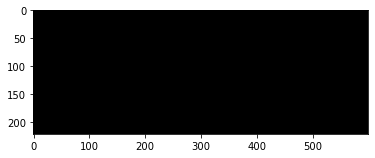

In [23]:
plt.imshow(mask,cmap='gray')

In [24]:
masked_img = cv2.bitwise_and(img,img,mask = mask)
show_masked_img = cv2.bitwise_and(show_rainbow,show_rainbow,mask = mask)

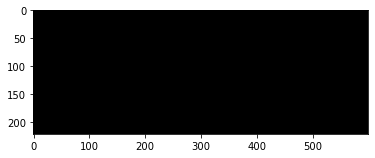

In [25]:
plt.imshow(show_masked_img)

In [26]:
hist_mask_values_red = cv2.calcHist([rainbow],channels=[2],mask=mask,histSize=[256],ranges=[0,256])
hist_full_values_red = cv2.calcHist([rainbow],channels=[2],mask=None,histSize=[256],ranges=[0,256])

Text(0.5, 1.0, 'Histogram for RED values of the full image')

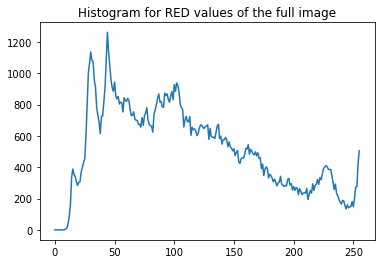

In [27]:
plt.plot(hist_full_values_red)
plt.title('Histogram for RED values of the full image')

Text(0.5, 1.0, 'Histogram for RED values for the Masked Area')

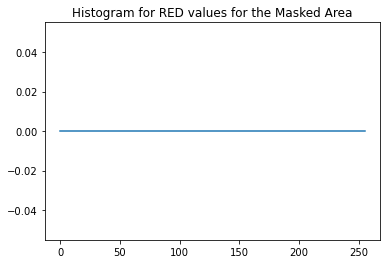

In [28]:
plt.plot(hist_mask_values_red)
plt.title('Histogram for RED values for the Masked Area')